# Interpolator Error Calculator

## Imports and Path Settings

In [3]:
import struct
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from scipy.interpolate import griddata
from netCDF4 import Dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
REAL_PATH = Path.cwd()/'../Data/Interpolations'
FORECASTED_PATH = Path.cwd()/'../Data/SPEEDY'

In [5]:
REAL_FILES = [k.name for k in REAL_PATH.rglob('*.grd')]
FORECASTED_FILES = [k.name for k in FORECASTED_PATH.rglob('*.grd')]

In [4]:
def read_speedy_grd():
    infile = open(filename, "rb")    
    data = np.fromfile(infile , '>f4')

In [6]:
def Error_plots(true_noaa, forcast_speedy):
    #true_noaa_array = np.reshape(true_noaa ,(96,48))
    #forcast_speedy_array = np.reshape(forcast_speedy ,(96,48))
    RMSE = mean_squared_error(true_noaa, forcast_speedy)
    MSE = mean_absolute_error(true_noaa, forcast_speedy)
    plt.figure(figsize=(16,28))
    ax1 = plt.subplot(311)
    ax1 = plt.contourf(true_noaa)
    ax1 = plt.title("TRUE NOAA")
    ax2 = plt.subplot(312)
    ax2 = plt.contourf(forcast_speedy)
    ax2 = plt.title("FORCAST SPEEDY")
    ax3 = plt.subplot(313)
    ax3 = plt.contourf(np.abs(true_noaa-forcast_speedy))
    ax3 = plt.title("ABS TRUE NOAA - FORCAST SPEEDY (ERRORS)")
    plt.colorbar()
    plt.show()
    print("RMSE:",RMSE, "MSE:", MSE)
    return RMSE, MSE

In [42]:
nlon=96;
nlat=48;
nlev=7;
filename = FORECASTED_PATH/FORECASTED_FILES[0]
infile = open(filename, "rb")    
data = np.fromfile(infile , '>f4')

l = 0
U_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            U_SPEEDY[k,j,i] = data[l]
            l=l+1
            
V_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            V_SPEEDY[k,j,i] = data[l]
            l=l+1
            
T_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            T_SPEEDY[k,j,i]  = data[l]
            l=l+1
            
SH_SPEEDY = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            SH_SPEEDY[k,j,i] = data[l]
            l=l+1
    
    
P_SPEEDY = np.empty([nlat,nlon])
for j in range(nlat):#range(nlat-1,-1,-1): #range(nlat):
    for i in range(nlon):
        P_SPEEDY[j,i] = data[l]
        l=l+1

In [36]:
data_list = list(U_SPEEDY.ravel()) + list(V_SPEEDY.ravel()) + list(T_SPEEDY.ravel()) + list(SH_SPEEDY.ravel()) + list(P_SPEEDY.ravel())

In [40]:
data == data_list
np.array_equal(data,data_list)

True

In [43]:
REAL_FILES

nlon=96;
nlat=48;
nlev=7;
filename = REAL_PATH/REAL_FILES[0]
infile = open(filename, "rb")    
data = np.fromfile(infile , '>f4')

l = 0
l = 0
U_REAL = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            U_REAL[k,j,i] = data[l]
            l=l+1
            
V_REAL = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            V_REAL[k,j,i] = data[l]
            l=l+1
            
T_REAL = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            T_REAL[k,j,i]  = data[l]
            l=l+1
            
SH_REAL = np.empty([nlev,nlat,nlon])
for k in range(nlev):
    for j in range(nlat):
        for i in range(nlon):
            SH_REAL[k,j,i] = data[l]
            l=l+1
    
    
P_REAL = np.empty([nlat,nlon])
for j in range(nlat):#range(nlat-1,-1,-1): #range(nlat):
    for i in range(nlon):
        P_REAL[j,i] = data[l]
        l=l+1

In [10]:
REAL_FILES

['2020070100.grd', '2020070106.grd', '2020070112.grd', '2020070118.grd']

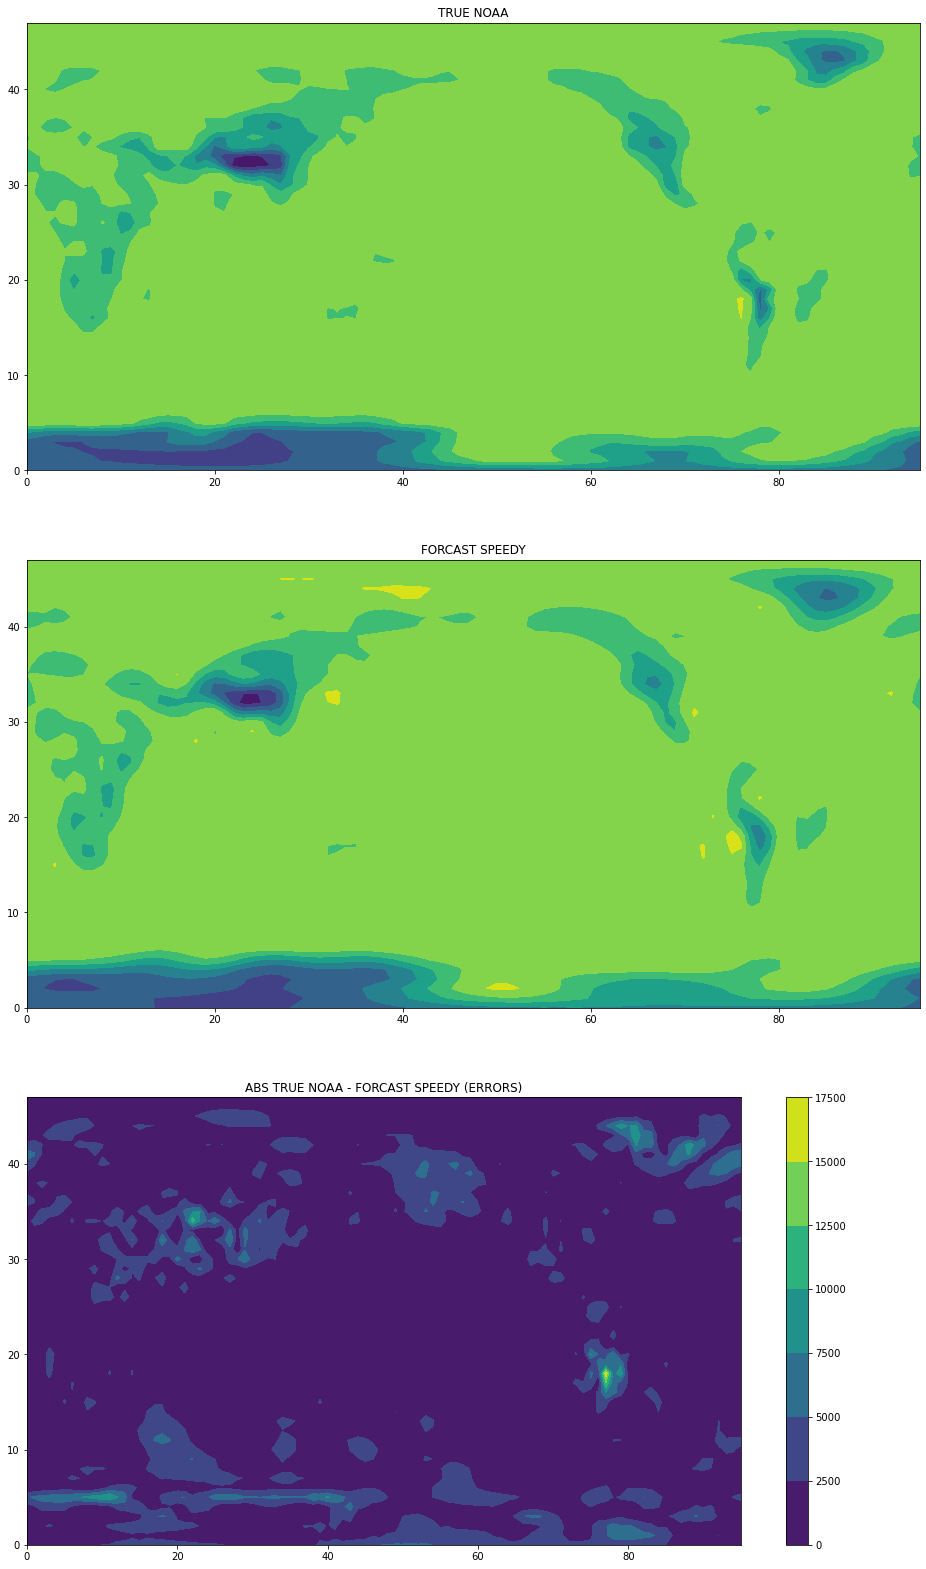

RMSE: 4028720.1512111723 MSE: 1435.0180248684355


(4028720.1512111723, 1435.0180248684355)

In [44]:
Error_plots(P_REAL[:,:], P_SPEEDY)